In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
df_world = pd.read_csv('countries of the world.csv')

In [7]:
# Let's view the top 5 rows of the dataset

df_world.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN


In [8]:
# To find the columns with missing values

df_world.isnull().sum()

Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          3
Infant mortality (per 1000 births)     3
GDP ($ per capita)                     1
Literacy (%)                          18
Phones (per 1000)                      4
Arable (%)                             2
Crops (%)                              2
Other (%)                              2
Climate                               22
Birthrate                              3
Deathrate                              4
Agriculture                           15
Industry                              16
Service                               15
dtype: int64

In [9]:
# We will deal with the missing values in the following ways
# 1. Dropping the columns we will not focus on
# 2. In the columns we are focusing on, we will eliminate the rows with the missing values

# Note: It is also possible to replace the missing values with the mean, median, or any other statistic derived from the
# populated rows; we will focus on that method of handling missing data in future posts

In [10]:
# Dropping columns

df_world.drop(df_world.columns[11:20], axis=1, inplace=True)
df_world.drop('Coastline (coast/area ratio)', axis=1, inplace=True)

In [11]:
# Checking the new dataframe - with fewer rows

df_world.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000)
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","23,06","163,07",700.0,"36,0","3,2"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","-4,93","21,52",4500.0,"86,5","71,2"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","-0,39",31,6000.0,"70,0","78,1"
3,American Samoa,OCEANIA,57794,199,"290,4","-20,71","9,27",8000.0,"97,0","259,5"
4,Andorra,WESTERN EUROPE,71201,468,"152,1","6,6","4,05",19000.0,"100,0","497,2"


In [12]:
# Dropping the rows with missing data, and creating a new dataframe - df_world1

df_world1 = df_world.dropna()

In [13]:
# Checking the new dataframe for missing values

df_world1.isnull().sum()

Country                               0
Region                                0
Population                            0
Area (sq. mi.)                        0
Pop. Density (per sq. mi.)            0
Net migration                         0
Infant mortality (per 1000 births)    0
GDP ($ per capita)                    0
Literacy (%)                          0
Phones (per 1000)                     0
dtype: int64

In [14]:
# To view the summary of the statistics of the columns with numerical values

df_world1.describe()

,Population,Area (sq. mi.),GDP ($ per capita)
count,2.040000e+02,2.040000e+02,204.000000
mean,3.188551e+07,6.528199e+05,9690.686275
std,1.239948e+08,1.875278e+06,10201.451723
min,7.026000e+03,2.000000e+00,500.000000
25%,7.824992e+05,1.339250e+04,1900.000000
50%,6.178684e+06,1.108850e+05,5550.000000
75%,2.056211e+07,4.786050e+05,14550.000000
max,1.313974e+09,1.707520e+07,55100.000000


In [15]:
# Though we have 8 columns with numerical values, describe() has provided results only for 3 columns
# Hence, we need to check the datatypes of the columns

df_world1.dtypes

Country                                object
Region                                 object
Population                              int64
Area (sq. mi.)                          int64
Pop. Density (per sq. mi.)             object
Net migration                          object
Infant mortality (per 1000 births)     object
GDP ($ per capita)                    float64
Literacy (%)                           object
Phones (per 1000)                      object
dtype: object

In [16]:
# It can be seen above that some of the columns - such as Population - have pbject datatype, rather than int or float
# Converting the datatypes of the relevant columns into float

for i in range(0,10):
    if i!=0 and i!=1 and i!=2 and i!=3 and i!=7:
        df_world1[df_world1.columns[i]] = df_world1[df_world1.columns[i]].str.replace(',','.')
        df_world1[df_world1.columns[i]] = df_world1[df_world1.columns[i]].astype(float)
        df_world1[df_world1.columns[i]].round()

C:\Users\nikhi\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\nikhi\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [17]:
# Checking the datatypes

df_world1.dtypes

Country                                object
Region                                 object
Population                              int64
Area (sq. mi.)                          int64
Pop. Density (per sq. mi.)            float64
Net migration                         float64
Infant mortality (per 1000 births)    float64
GDP ($ per capita)                    float64
Literacy (%)                          float64
Phones (per 1000)                     float64
dtype: object

In [18]:
# Viewing the summary of statistics

df_world1.describe()

,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000)
count,2.040000e+02,2.040000e+02,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000
mean,3.188551e+07,6.528199e+05,359.644608,0.007500,37.241324,9690.686275,82.916667,225.623529
std,1.239948e+08,1.875278e+06,1711.989322,4.996637,36.283030,10201.451723,19.686091,218.988622
min,7.026000e+03,2.000000e+00,1.800000,-20.990000,2.290000,500.000000,17.600000,0.200000
25%,7.824992e+05,1.339250e+04,27.200000,-1.092500,8.525000,1900.000000,73.300000,32.400000
50%,6.178684e+06,1.108850e+05,74.200000,0.000000,23.395000,5550.000000,92.400000,158.950000
75%,2.056211e+07,4.786050e+05,182.525000,0.955000,61.577500,14550.000000,98.000000,369.200000
max,1.313974e+09,1.707520e+07,16271.500000,23.060000,191.190000,55100.000000,100.000000,1035.600000


In [19]:
# We will be using GeoJson file to plot data on worldmaps
# we want the columns 'Country' and 'Region' to be clean - without any unwanted spaces
# We will remove the spaces before and after strings

# This is how columns can look with unwanted spaces

df_world1['Region'].head(10)

0          ASIA (EX. NEAR EAST)         
1    EASTERN EUROPE                     
2    NORTHERN AFRICA                    
3    OCEANIA                            
4    WESTERN EUROPE                     
5    SUB-SAHARAN AFRICA                 
6                LATIN AMER. & CARIB    
7                LATIN AMER. & CARIB    
8                LATIN AMER. & CARIB    
9                   C.W. OF IND. STATES 
Name: Region, dtype: object

In [20]:
# Removing Spaces

for n in range(0,2):
    df_world1[df_world1.columns[n]] = df_world1[df_world1.columns[n]].astype(str)
    df_world1[df_world1.columns[n]] = df_world1[df_world1.columns[n]].str.strip()

C:\Users\nikhi\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\nikhi\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [21]:
# Checking whether the sopaces have been removed or not

df_world1['Region'].head(10)

0    ASIA (EX. NEAR EAST)
1          EASTERN EUROPE
2         NORTHERN AFRICA
3                 OCEANIA
4          WESTERN EUROPE
5      SUB-SAHARAN AFRICA
6     LATIN AMER. & CARIB
7     LATIN AMER. & CARIB
8     LATIN AMER. & CARIB
9     C.W. OF IND. STATES
Name: Region, dtype: object

In [22]:
# Data Visualization

# We will use Choropleth Maps to show 'Literacy (%)' and 'Infant mortality (per 1000 births)'

In [23]:
# Literacy (%)

import folium

# This is the GeoJSON file for the world map and must be saved in the file where jupyter file is saved
world_geo = r'world-countries.json'

# Creating the world map - cented at latitude=0 and longitude=0
world_map = folium.Map(location=[0, 0], zoom_start=2, tiles='Mapbox Bright')

world_geo = r'world-countries.json'

# create a numpy array of length 6 and has linear spacing from the minium total immigration to the maximum total immigration
threshold_scale = np.linspace(df_world1['Literacy (%)'].min(),
                              df_world1['Literacy (%)'].max(),
                              6, dtype=int)
threshold_scale = threshold_scale.tolist() # change the numpy array to a list
threshold_scale[-1] = threshold_scale[-1] + 1 # make sure that the last value of the list is greater than the maximum immigration


world_map = folium.Map(location=[0, 0], zoom_start=2, tiles='Mapbox Bright')
world_map.choropleth(
    geo_data=world_geo,
    data=df_world1,
    columns=['Country', 'Literacy (%)'],
    key_on='feature.properties.name',
    threshold_scale=threshold_scale,
    fill_color='Greens', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Literacy Rate',
    reset=True
)
world_map

In [24]:
# Infant mortality (per 1000 births)

import folium

# This is the GeoJSON file for the world map and must be saved in the file where jupyter file is saved
world_geo = r'world-countries.json'

# Creating the world map - cented at latitude=0 and longitude=0
world_map = folium.Map(location=[0, 0], zoom_start=2, tiles='Mapbox Bright')

world_geo = r'world-countries.json'

# create a numpy array of length 6 and has linear spacing from the minium total immigration to the maximum total immigration
threshold_scale = np.linspace(df_world1['Infant mortality (per 1000 births)'].min(),
                              df_world1['Infant mortality (per 1000 births)'].max(),
                              6, dtype=int)
threshold_scale = threshold_scale.tolist() # change the numpy array to a list
threshold_scale[-1] = threshold_scale[-1] + 1 # make sure that the last value of the list is greater than the maximum immigration


world_map = folium.Map(location=[0, 0], zoom_start=2, tiles='Mapbox Bright')
world_map.choropleth(
    geo_data=world_geo,
    data=df_world1,
    columns=['Country', 'Infant mortality (per 1000 births)'],
    key_on='feature.properties.name',
    threshold_scale=threshold_scale,
    fill_color='Reds', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Infant Mortality (per 1000 Births)',
    reset=True
)
world_map

In [25]:
# NOTE
# In the above 2 maps, the countries such as Ivory Coast and D.R.C (Congo) have missing values
# Or the name of these countries in the dataframe is not same as the one in the GeoJSON file
# hence, such countries have uniform lighter shade

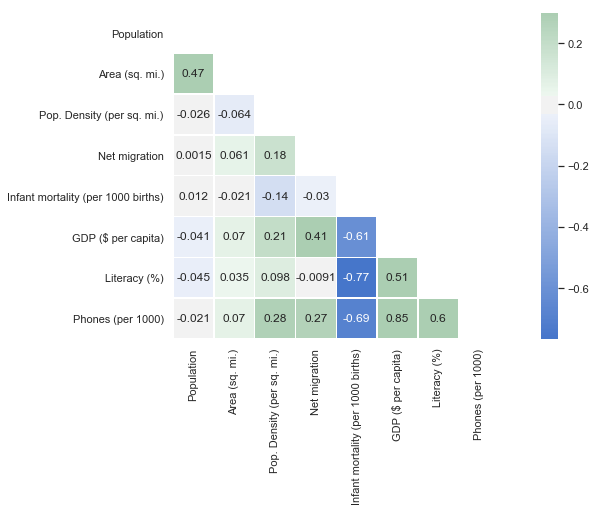

In [26]:
# To look at the correlation between different variables
# We will need to import seaborn

import seaborn as sns


df_corr = df_world1.corr()

sns.set(style="white")
mask = np.zeros_like(df_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(15, 6))

cmap = sns.diverging_palette(255, 133, as_cmap=True)

sns.heatmap(df_corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=0.5, annot=True)

[]

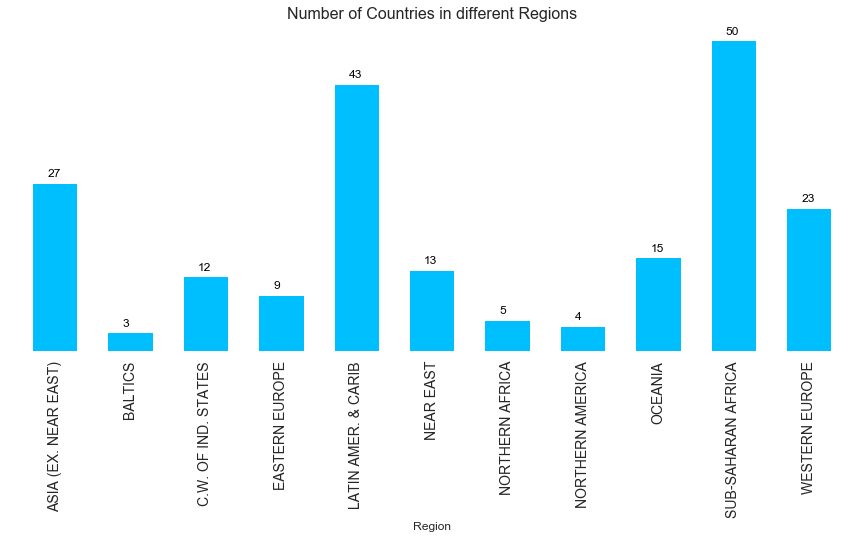

In [27]:
# Plotting the number of countries under each Region

df_region = df_world1[['Region','Country']]
df_region1 = df_region.groupby('Region').count()
pd.DataFrame(df_region1)

ax = df_region1.plot(kind='bar', figsize=(15,6), width=0.6, color=['#00bfff'], fontsize=14)
ax.set_title("Number of Countries in different Regions", fontsize=16)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(False)
ax.spines['left'].set_linewidth(False)
ax.get_yaxis().set_visible(False)
ax.get_legend().remove()


for index, value in enumerate(df_region1['Country']): 
    label = int(value) 
    ax.annotate(label, xy=(index-0.1,value+1), color='black')
        
ax.plot()

# The plot is simple, but the focus here is on making it as simple as possible
# Removing the frame and axes, and placing values at the top of the bar serves the purpose in this case
# In the future posts, we will have a look at how seaborn can be used to plot the same graph much more easily

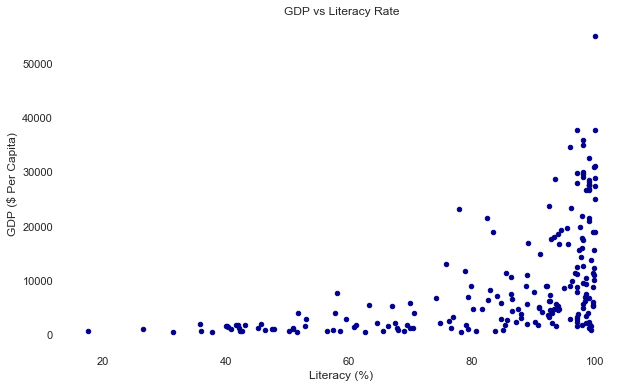

In [28]:
# Drawing a scatter plot with GDP on y-axis and Literacy on x-axis

ax = df_world1.plot(kind='scatter', x='Literacy (%)', y='GDP ($ per capita)', figsize=(10, 6), color='darkblue')

ax.set_title('GDP vs Literacy Rate')
ax.set_xlabel('Literacy (%)')
ax.set_ylabel('GDP ($ Per Capita)')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(False)
ax.spines['left'].set_linewidth(False)

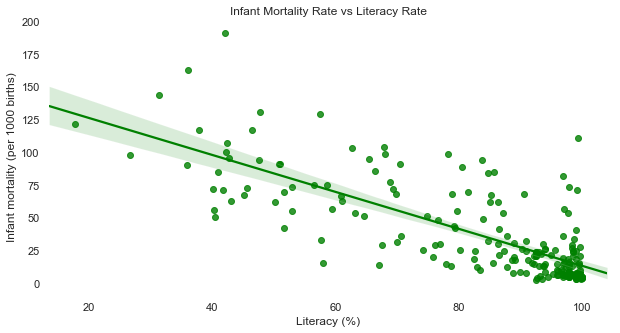

In [29]:
# We can easily draw a scatter plot with a linear regression line through it using seaborn

ax = sns.regplot(x='Literacy (%)', y='Infant mortality (per 1000 births)', data=df_world1, color='green')

ax.set_title('Infant Mortality Rate vs Literacy Rate')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(False)
ax.spines['left'].set_linewidth(False)


ax.figure.set_size_inches(10, 5)

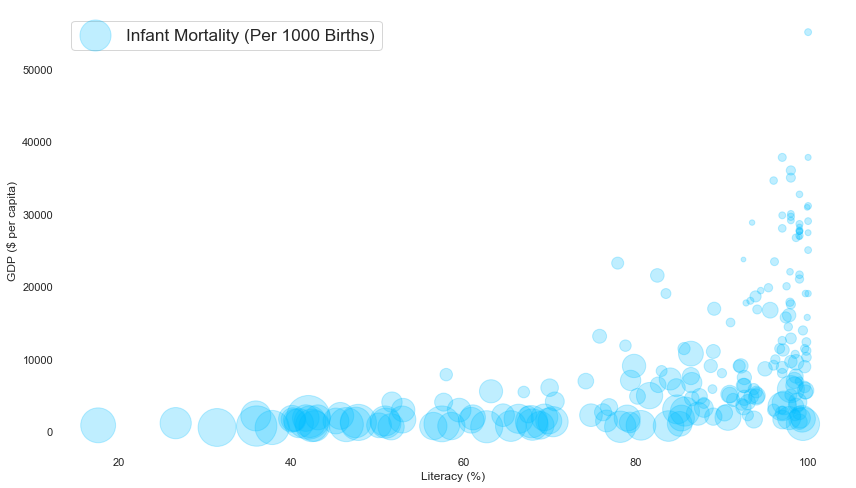

In [30]:
ax = df_world1.plot(kind='scatter',
                    x='Literacy (%)',
                    y='GDP ($ per capita)',
                    figsize=(14, 8),
                    alpha=0.25,                  # transparency
                    color='#00bfff',
                    s=df_world1['Infant mortality (per 1000 births)']*10,  # pass in weights for bubbles
                   )

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(False)
ax.spines['left'].set_linewidth(False)

ax.legend(['Infant Mortality (Per 1000 Births)'], loc='upper left', fontsize='x-large')

In [31]:
# Here, we are showing all the 3 vairables - Literacy, GDP, and Infant Mortality Rates - in a single plot.
# We can observe that as GDP and Literacy increases, the Infant Mortality Rate (bubble size) reduces.
# The decrease in the Infant Mortality Rate becomes comparatively steep for GDP greater than 10000 and Literacy greater than 90.